<a href="https://colab.research.google.com/github/Saraldedv/CCDEPLRL_EXERCISES/blob/main/exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4


## Instructions


1. Collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_4** in your **CCDEPLRL_EXERCISES_COM222_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Deadline of submission is on **April 22, 2025**

## Model

In [48]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-04-22 08:45:51--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.142.25, 104.192.142.24, 104.192.142.26, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip.1’

fruits.zip.1        100%[===================>] 101.04M  17.1MB/s    in 6.2s    

2025-04-22 08:45:59 (16.2 MB/s) - ‘fruits.zip.1’ saved [105946856/105946856]



In [49]:
!unzip fruits.zip

Archive:  fruits.zip
replace __MACOSX/._fruits? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [50]:
#!rm -r /content/fruits/test/olives

#!rm -r /content/fruits/train/olives

#!rm -r /content/fruits/validation/olives



Import the libraries

In [51]:
import tensorflow as tf
import matplotlib.pyplot as plt

Hyperparameters: Set the image size and batch size

In [52]:
img_height, img_width = 32, 32
batch_size = 20

Split the images into train, validation and test

In [53]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 599 files belonging to 4 classes.
Found 106 files belonging to 4 classes.
Found 170 files belonging to 4 classes.


Display sample images from the dataset

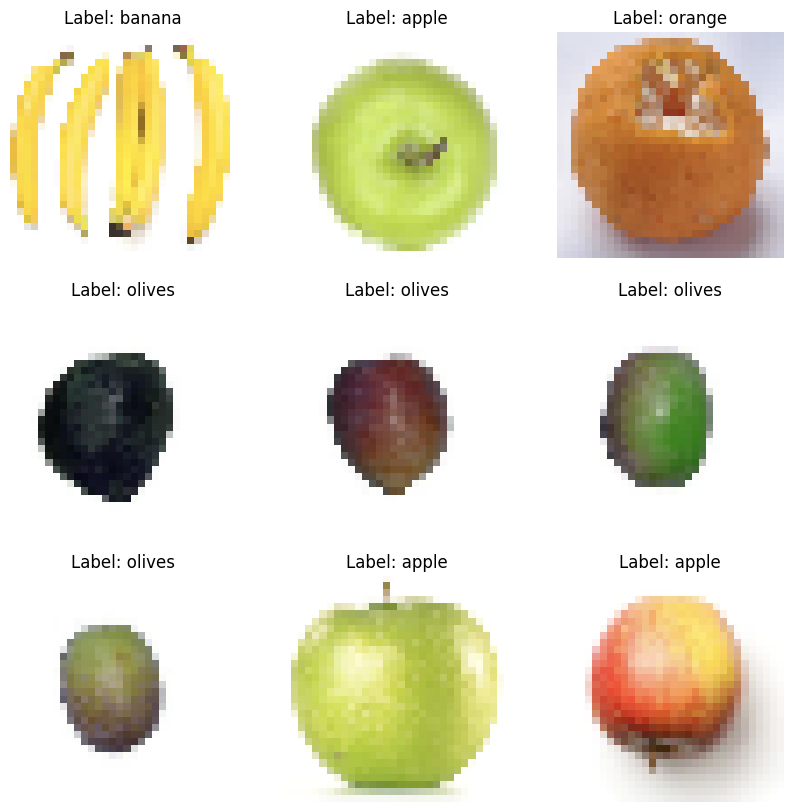

In [54]:
class_names = train_ds.class_names

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"Label: {class_names[labels[i]]}")
    plt.axis("off")

Create the Convolutional Neural Network Model (CNN)

In [55]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(128, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="sigmoid"),
     tf.keras.layers.Dense(4)
    ]
)


In [56]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Define the optimizer and loss function

In [57]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

Train the model

In [68]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9775 - loss: 0.0694 - val_accuracy: 0.9811 - val_loss: 0.0780
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9780 - loss: 0.0672 - val_accuracy: 0.8962 - val_loss: 0.4063
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9706 - loss: 0.1023 - val_accuracy: 0.9528 - val_loss: 0.1439
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9686 - loss: 0.0888 - val_accuracy: 0.9623 - val_loss: 0.0984
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9729 - loss: 0.1004 - val_accuracy: 0.9906 - val_loss: 0.0585
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9680 - loss: 0.0999 - val_accuracy: 0.9528 - val_loss: 0.1183
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9787 - loss: 0.0667 - val_accuracy: 0.9528 - val_loss: 0.1102
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9835 - loss: 0.0303 - val_accuracy: 0.9245 - v

Test the model

In [75]:
model.evaluate(test_ds)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9835 - loss: 0.0501


[0.0888361856341362, 0.9647058844566345]

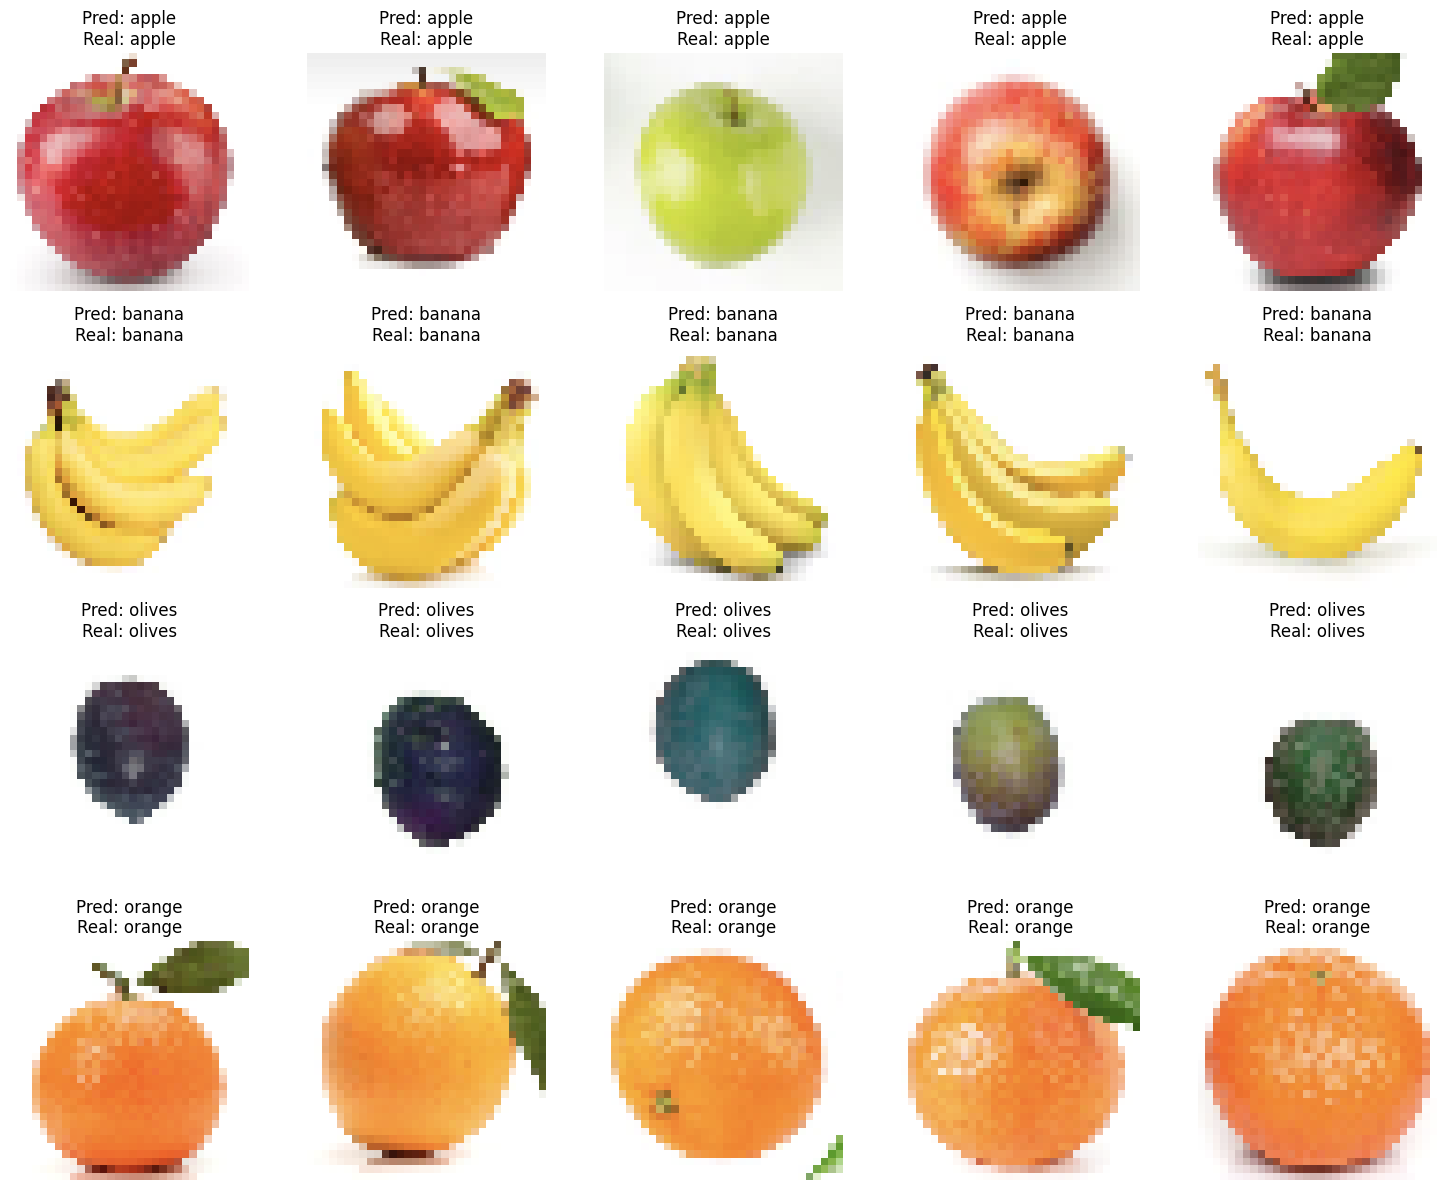

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Prepare a map from class index to image list
samples_per_class = {i: [] for i in range(len(class_names))}
needed_per_class = 5

# Go through dataset until we get 5 from each class
for images, labels in test_ds.unbatch():
    label = int(labels.numpy())
    if len(samples_per_class[label]) < needed_per_class:
        samples_per_class[label].append(images)

    if all(len(samples) == needed_per_class for samples in samples_per_class.values()):
        break

# Flatten list in class order: apple, orange, longan, banana
final_images = []
final_labels = []
for class_idx in range(len(class_names)):
    final_images.extend(samples_per_class[class_idx])
    final_labels.extend([class_idx] * needed_per_class)

# Convert to tensor
final_images = tf.stack(final_images)

# Run predictions
classifications = model(final_images)

# Plot
plt.figure(figsize=(15, 12))
for i in range(len(final_images)):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(final_images[i].numpy().astype("uint8"))
    pred_index = np.argmax(classifications[i])
    real_index = final_labels[i]
    plt.title(f"Pred: {class_names[pred_index]}\nReal: {class_names[real_index]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

Save the model

In [77]:
model.save('fruitModel.keras')